## Plan To Solve

### 1. Find the Contour Plots after the Canny Filter
### 2. Based on that Find the Horizontal Angle (Angle Needed to be Rotated to Make Horizontal)
### 3. Take the Template and Find the Angle -> Call It Final_Angle
### 4. Do this for each and every datapoint in the dataset
### 5. Now Make Every Image Horizontal
### 6. Apply the Opposite transform as applied for the Template

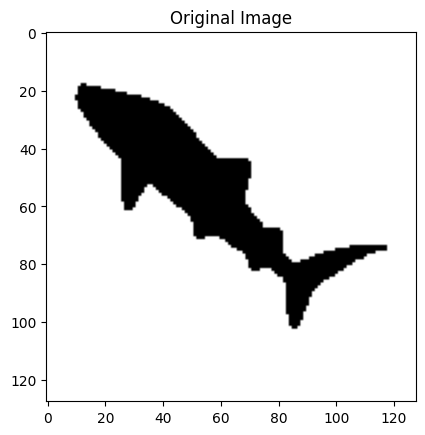

Image orientation angle (degrees): 38.099819627983464


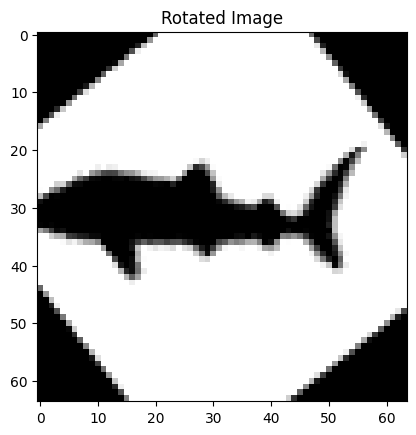

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./KIMIA/whalesharks.png')  # Replace with the path to your image -> Consider this to be your Template Image
# Plot the Original Image
plt.imshow(image)
plt.title('Original Image')
plt.show()

# Resize the image
image = cv2.resize(image, (64, 64))
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=30, threshold2=100)

# ---------------------------------------------------- CHATGPT -------------------------------------------------------------------
# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Only Outer Contours, and only the two endpoints of each line

if len(contours) <= 0:
    final_orientation_angle_degrees = 0

# Calculate the orientation angle of the largest contour
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    moments = cv2.moments(largest_contour)
    final_orientation_angle = 0.5 * np.arctan2(2 * moments['mu11'], moments['mu20'] - moments['mu02'])
    final_orientation_angle_degrees = np.degrees(final_orientation_angle)

# ---------------------------------------------------- CHATGPT -------------------------------------------------------------------

# Print the orientation angle
print("Image orientation angle (degrees):", final_orientation_angle_degrees)

# Rotate the image to correct for the orientation angle
rows, cols, val = image.shape
M = cv2.getRotationMatrix2D((cols // 2, rows // 2), final_orientation_angle_degrees, 1) # Centre, and 1 is the scale factor
rotated_image = cv2.warpAffine(image, M, (cols, rows))
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()


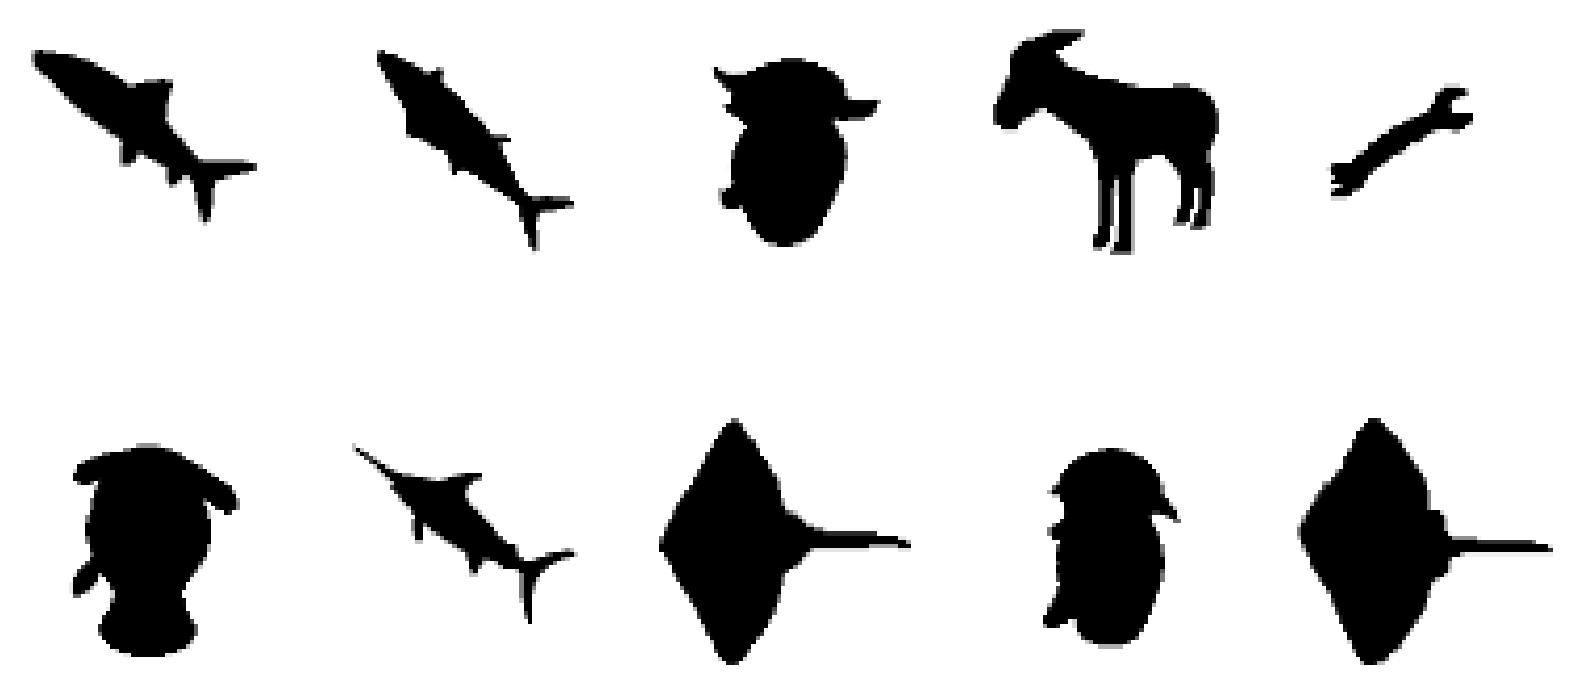

In [10]:
# Show all the Images, naturally
# Randomly Sample 10 Images from the Image Dataset
import os
import random
import matplotlib.pyplot as plt


# Initalize a random Seed
random.seed(20)

# Path to the dataset folder
dataset_path = './KIMIA/'
# Get the list of all the images in the dataset folder
images = os.listdir(dataset_path)
# Randomly sample the 10 Indices
random_indices = random.sample(range(0, len(images)), 10)
fig = plt.figure(figsize=(20, 20))

for i in range(10):
    # Plot the original image
    ax = fig.add_subplot(4, 5, i + 1)
    image = cv2.imread(dataset_path + images[random_indices[i]])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    plt.imshow(image)
    plt.axis('off')



## Bring Everything Horizontal

Image orientation angle (degrees): 36.823561155781036
Image orientation angle (degrees): 45.29294744825755
Image orientation angle (degrees): -85.40831305383689
Image orientation angle (degrees): 42.89654781685282
Image orientation angle (degrees): -34.43586280654629
Image orientation angle (degrees): -86.02784498651889
Image orientation angle (degrees): 33.33520896053199
Image orientation angle (degrees): -88.75053044462874
Image orientation angle (degrees): -86.00305472564503
Image orientation angle (degrees): 85.33632388710141


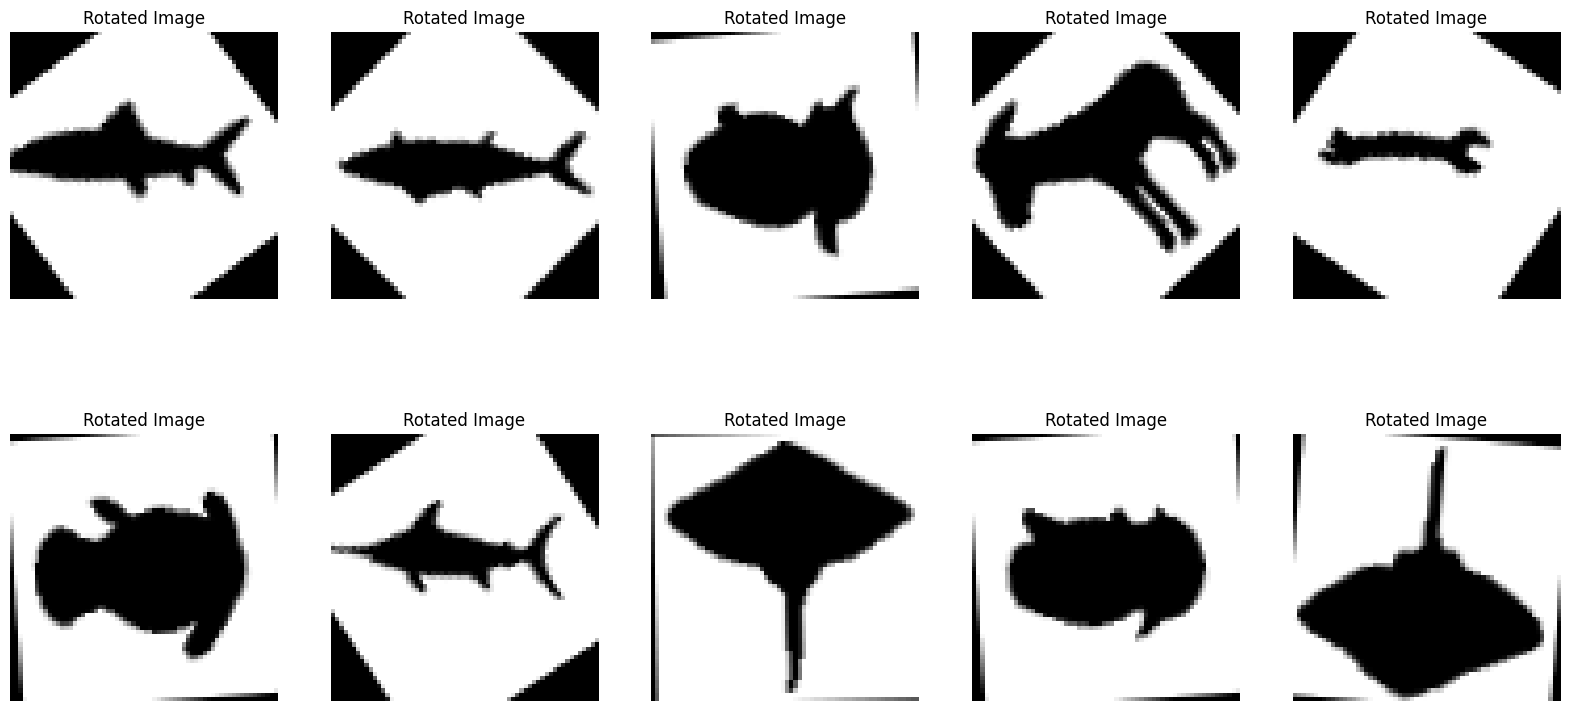

In [11]:
# Randomly Sample 10 Images from the Image Dataset
import os
import random

# Initalize a random Seed
random.seed(20)

# Path to the dataset folder
dataset_path = './KIMIA/'
# Get the list of all the images in the dataset folder
images = os.listdir(dataset_path)
# Randomly sample the 10 Indices

# Plot the 10 images
fig = plt.figure(figsize=(20, 20))

# Append all the Rotated Images to a list
rotated_images = []

for i in range(10):
    # Plot the original image
    ax = fig.add_subplot(4, 5, i + 1)
    image = cv2.imread(dataset_path + images[random_indices[i]])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    plt.imshow(image)
    plt.axis('off')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1=30, threshold2=100)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) <= 0:
        orientation_angle_degrees = 0

    # Calculate the orientation angle of the largest contour
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)
        moments = cv2.moments(largest_contour)
        orientation_angle = 0.5 * np.arctan2(2 * moments['mu11'], moments['mu20'] - moments['mu02'])
        orientation_angle_degrees = np.degrees(orientation_angle)

    # ---------------------------------------------------- CHATGPT -------------------------------------------------------------------
    # Print the orientation angle
    print("Image orientation angle (degrees):", orientation_angle_degrees)

    # Rotate the image to correct for the orientation angle
    rows, cols, val = image.shape
    M = cv2.getRotationMatrix2D((cols // 2, rows // 2), orientation_angle_degrees, 1) # Centre, and 1 is the scale factor
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    plt.imshow(rotated_image)
    plt.title('Rotated Image')
    rotated_images.append(rotated_image)

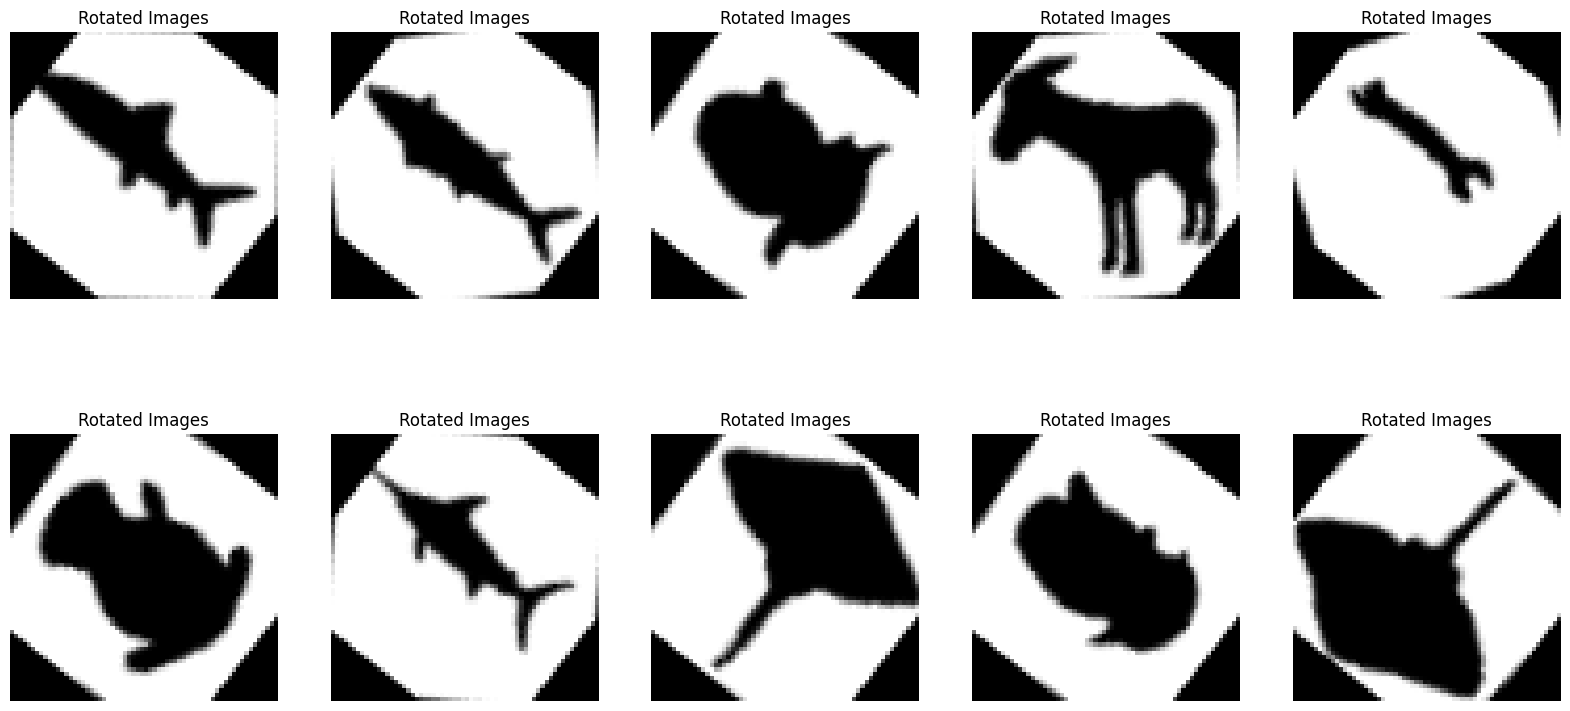

In [12]:
# Rotate all the Rotated Images, by the -ve final orientation angle and Plot them 
fig = plt.figure(figsize=(20, 20))

for i in range(10):
    rotated_image = rotated_images[i]
    rows, cols, val = rotated_image.shape
    M = cv2.getRotationMatrix2D((cols // 2, rows // 2), -final_orientation_angle_degrees, 1)
    rotated_image = cv2.warpAffine(rotated_image, M, (cols, rows))
    ax = fig.add_subplot(4, 5, i + 1)
    plt.imshow(rotated_image)
    plt.axis('off')
    plt.title('Rotated Images')

plt.show()
